In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [4]:
crime_file="../data/cleandata/Harris_County_Crime_Ct_by_zipcode.csv"
prop_value_file="../data/rawdata/Property_data.csv"
crime_ct_df = pd.read_csv(crime_file, encoding="ISO-8859-1")
prop_value_df = pd.read_csv(prop_value_file, encoding="ISO-8859-1")
zip_prop_value_avg=prop_value_df.groupby(['zip'])['estimate'].mean()
zip_prop_value_avg_df=pd.DataFrame(zip_prop_value_avg).reset_index()
zip_prop_value_avg_df.head()

,zip,estimate
0,77003,304618.520
1,77004,332700.348
2,77005,1185270.596
3,77006,642616.528
4,77007,528380.128


In [7]:
zip_prop_value_avg_df = zip_prop_value_avg_df.rename(
    columns={"zip": "ZIP"
            })
zip_prop_value_avg_df.head()

,ZIP,estimate
0,77003,304618.520
1,77004,332700.348
2,77005,1185270.596
3,77006,642616.528
4,77007,528380.128


In [5]:
crime_ct_df.head()

,ZIP,Non-Violet Ct,Violet Ct,LAT,LNG
0,77002,148,32,29.756845,-95.365652
1,77003,54,7,29.749778,-95.345885
2,77004,131,42,29.724893,-95.363752
3,77005,30,1,29.718435,-95.423555
4,77006,131,16,29.740970,-95.391301


In [15]:
merged_data=crime_ct_df.merge(zip_prop_value_avg_df, on="ZIP", how="right")
merged_data=merged_data.sort_values('estimate',ascending=False).reset_index(drop=True)
merged_data=merged_data.reset_index()
merged_data.head()

,index,ZIP,Non-Violet Ct,Violet Ct,LAT,LNG,estimate
0,0,77019,103.0,5.0,29.754150,-95.409498,1337546.668
1,1,77024,103.0,6.0,29.772179,-95.514203,1311313.400
2,2,77005,30.0,1.0,29.718435,-95.423555,1185270.596
3,3,77056,129.0,7.0,29.748202,-95.468948,1144477.220
4,4,77027,82.0,3.0,29.740079,-95.446409,1077188.354


In [18]:
merged_data = merged_data.dropna(how="any")
merged_data.head()

,index,ZIP,Non-Violet Ct,Violet Ct,LAT,LNG,estimate
0,0,77019,103.0,5.0,29.754150,-95.409498,1337546.668
1,1,77024,103.0,6.0,29.772179,-95.514203,1311313.400
2,2,77005,30.0,1.0,29.718435,-95.423555,1185270.596
3,3,77056,129.0,7.0,29.748202,-95.468948,1144477.220
4,4,77027,82.0,3.0,29.740079,-95.446409,1077188.354


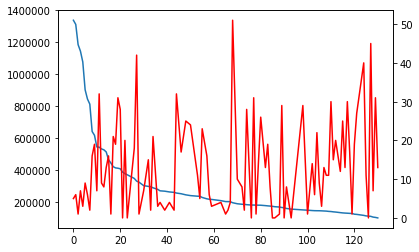

In [19]:
fig, ax1 = plt.subplots()
ax1.plot(merged_data["index"], merged_data["estimate"])
ax2=ax1.twinx()
ax2.plot(merged_data["index"], merged_data["Violet Ct"], color='red')


In [20]:
correlation=merged_data['estimate'].corr(merged_data["Violet Ct"])
print(correlation)
covariance = np.cov(merged_data['estimate'], merged_data["Violet Ct"])
print(covariance)
correlation2 = pearsonr(merged_data['estimate'], merged_data["Violet Ct"])
print(correlation2)
correlation3 = spearmanr(merged_data['estimate'], merged_data["Violet Ct"])
print(correlation3)

-0.18641741825471833
[[ 7.11225287e+10 -5.81740699e+05]
 [-5.81740699e+05  1.36923732e+02]]
(-0.18641741825471833, 0.06607619670789451)
SpearmanrResult(correlation=-0.14461590978487363, pvalue=0.1553934516726349)


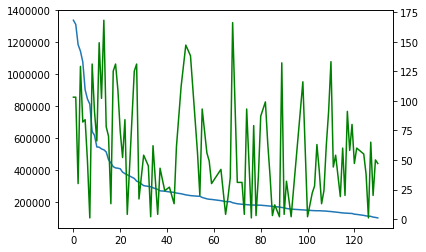

In [21]:
fig, ax1 = plt.subplots()
ax1.plot(merged_data["index"], merged_data["estimate"])
ax2=ax1.twinx()
ax2.plot(merged_data["index"], merged_data["Non-Violet Ct"], color='green')


In [22]:
correlation=merged_data['estimate'].corr(merged_data["Non-Violet Ct"])
print(correlation)
covariance = np.cov(merged_data['estimate'], merged_data["Non-Violet Ct"])
print(covariance)
correlation2 = pearsonr(merged_data['estimate'], merged_data["Non-Violet Ct"])
print(correlation2)
correlation3 = spearmanr(merged_data['estimate'], merged_data["Non-Violet Ct"])
print(correlation3)

0.2887707692940689
[[7.11225287e+10 3.38500091e+06]
 [3.38500091e+06 1.93198580e+03]]
(0.28877076929406886, 0.003930234365722617)
SpearmanrResult(correlation=0.2760551404328988, pvalue=0.005933689112997683)
